# CIAO AO Explanation and Validation

In this notebook we explain and validate several aspects of CIAO's closed-loop operation. We start by validating the loop, by comparing CIAO's calculations with explicit calculations. Second, we validate CIAO's poke matrix methods by explicitly computing a poke matrix. Finally, we explain and validate the wavefront and residual error calculations.

## Explaining and validating the AO loop

Let's start by importing the CIAO modules and config files, as well as the scientific stack. Then we run the simulation check that is executed at the top of every CIAO script.

In [1]:
import sys,os
from sys import exit
import ciao_config as ccfg
import ciao
from matplotlib import pyplot as plt
import numpy as np


No module named pypylon
No module named ximea
[Errno 17] File exists: '.gui_settings'


In [2]:
if ccfg.simulate:
    sim = ciao.simulator.Simulator()
    cam = sim
    mirror = cam
else:
    cam = ciao.cameras.get_camera()
    mirror = ciao.mirrors.Mirror()
    
sensor = ciao.sensors.Sensor(cam)

if ccfg.simulate:
    # required to remove tip/tilt in simulated image
    sensor.record_reference()


Loading cached actuator basis set...
Loading cached zernike basis set...
recording reference
sensor paused
measurement 1 of 10 Sensor sense method
start -> cam.get_image: 27.387 ms
cam.get_image -> image stats: 0.159 ms
image stats -> estimate background: 0.138 ms
estimate background -> centroid: 0.337 ms
centroid -> reconstruct wavefront: 0.161 ms
reconstruct wavefront -> end sense: 0.001 ms

...done
measurement 2 of 10 Sensor sense method
start -> cam.get_image: 27.419 ms
cam.get_image -> image stats: 0.165 ms
image stats -> estimate background: 0.134 ms
estimate background -> centroid: 0.342 ms
centroid -> reconstruct wavefront: 0.157 ms
reconstruct wavefront -> end sense: 0.001 ms

...done
measurement 3 of 10 Sensor sense method
start -> cam.get_image: 29.373 ms
cam.get_image -> image stats: 0.199 ms
image stats -> estimate background: 0.173 ms
estimate background -> centroid: 0.466 ms
centroid -> reconstruct wavefront: 0.192 ms
reconstruct wavefront -> end sense: 0.001 ms

...done

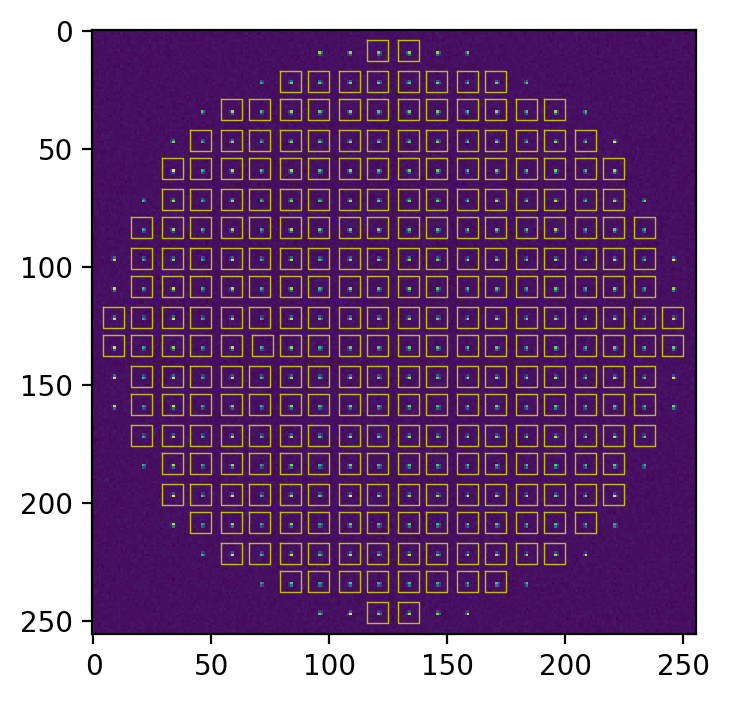

In [3]:
plt.figure(dpi=200)
plt.imshow(cam.get_image())
plt.autoscale(False)
for y1,y2,x1,x2 in zip(sensor.search_boxes.y1,
                       sensor.search_boxes.y2,
                       sensor.search_boxes.x1,
                       sensor.search_boxes.x2):
    plt.plot([x1,x2-1,x2-1,x1,x1],[y1,y1,y2-1,y2-1,y1],'y-',linewidth=.5)

In [4]:
sensor.sense()

Sensor sense method
start -> cam.get_image: 29.766 ms
cam.get_image -> image stats: 0.171 ms
image stats -> estimate background: 0.143 ms
estimate background -> centroid: 0.379 ms
centroid -> reconstruct wavefront: 0.170 ms
reconstruct wavefront -> end sense: 0.001 ms



## Centroiding

Let's calculate the center of mass of the 20th lenslet, making sure we follow the same approach specified in ciao_config.py.

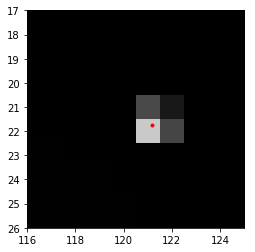

In [6]:
n_iterations = ccfg.centroiding_iterations
half_width= ccfg.search_box_half_width
iterative_step = ccfg.iterative_centroiding_step

# an explicit centroiding function
def centroid(spots,x_float,y_float,hw,n_iterations):
    x,y = int(round(x_float)),int(round(y_float))
    for k in range(n_iterations):
        x1 = x - hw
        x2 = x + hw
        y1 = y - hw
        y2 = y + hw
        arr = spots[y1:y2,x1:x2]

    #plt.subplot(1,2,1)
    plt.imshow(spots,cmap='gray')
    plt.xlim([x1,x2-1])
    plt.ylim([y2-1,y1])
    plt.autoscale(False)
    plt.plot(x_float,y_float,'r.')
    
    #plt.subplot(1,2,2)
    #plt.imshow(arr)
    
idx=5
x_float = sensor.search_boxes.x[idx]
y_float = sensor.search_boxes.y[idx]

centroid(sensor.cam.spots,x_float,y_float,half_width,n_iterations)
    